# DECISION TREE MODEL BUILD

In [10]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil  
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import joblib


# Function to measure CPU, Memory, and Disk I/O usage
def measure_system_resources():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_io = psutil.disk_io_counters()
    
    memory_used = memory_info.used / (1024 * 1024)  # Convert to MB
    disk_io_used = (disk_io.read_bytes + disk_io.write_bytes) / (1024 * 1024)  # Convert to MB
    
    return cpu_usage, memory_used, disk_io_used

In [11]:
# Step 1: Load Train and Test Datasets
train_data = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/train.csv')
test_data = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/CICIDS-2017/test.csv')

 # Splitting features and labels

In [12]:
X_train = train_data.drop(['label'], axis=1)  # Features
y_train = train_data['label']  # Target variable
X_test = test_data.drop(['label'], axis=1)  # Features
y_test = test_data['label']  # Target variable

# Splitting training set for validation

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Visualizing PCA Data

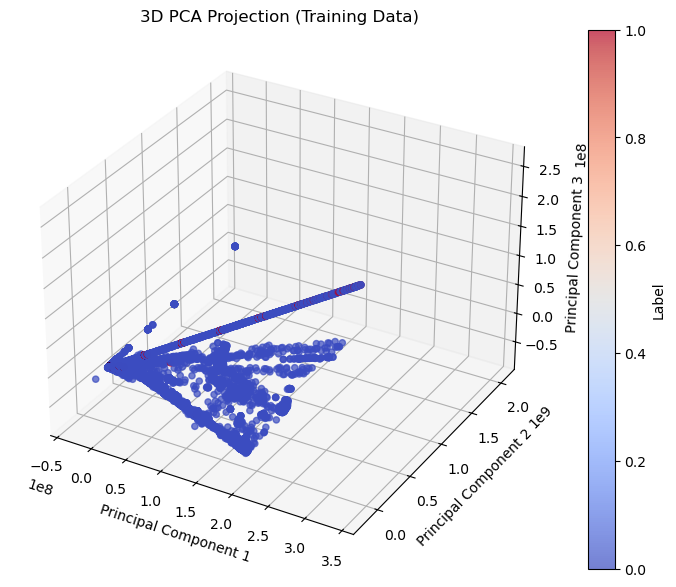

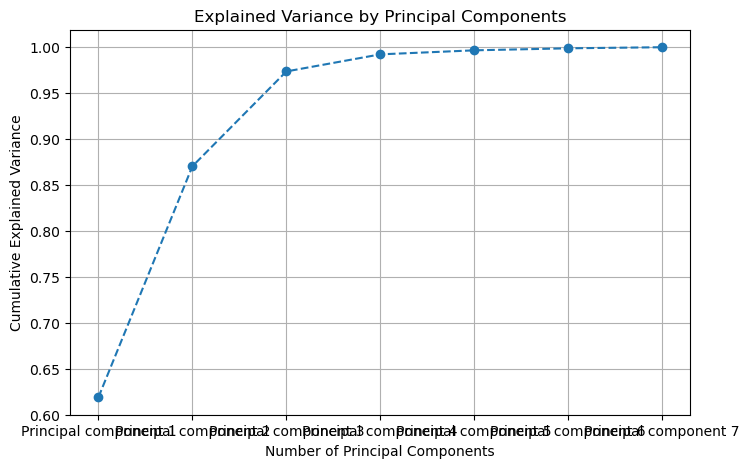

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2], 
    c=y_train, cmap='coolwarm', alpha=0.7
)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection (Training Data)")

plt.colorbar(scatter, ax=ax, label='Label')
plt.show()



# Calculate explained variance ratio manually
explained_variance = np.var(X_train, axis=0) / np.sum(np.var(X_train, axis=0))

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


# Model Creation and Training

In [15]:
# Start time and system resource tracking
start_time = time.time()
cpu_before, memory_before, disk_io_before = measure_system_resources()

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# End time and resource tracking
end_time = time.time()
cpu_after, memory_after, disk_io_after = measure_system_resources()
execution_time = end_time - start_time

cpu_usage_change = cpu_after - cpu_before
memory_used = memory_after - memory_before
disk_io_used = disk_io_after - disk_io_before

# Report computational overhead
print("\nüöÄ **Computational Overhead Report (Decision Tree Training)** üöÄ")
print(f"‚è≥ **Execution Time:** {execution_time:.4f} seconds")
print(f"üî• **CPU Usage Change:** {cpu_usage_change:.2f}%")
print(f"üíæ **Disk I/O Usage:** {disk_io_used:.2f} MB")
print(f"üìä **Memory Usage:** {memory_used:.2f} MB")



üöÄ **Computational Overhead Report (Decision Tree Training)** üöÄ
‚è≥ **Execution Time:** 1.9128 seconds
üî• **CPU Usage Change:** -2.10%
üíæ **Disk I/O Usage:** 0.64 MB
üìä **Memory Usage:** 31.48 MB


#  Validate the Model

In [16]:
# Predict on validation set
y_val_pred = dt_model.predict(X_val)

# Compute validation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary')
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_f1 = f1_score(y_val, y_val_pred, average='binary')

# Display validation results
print("\nüöÄ **Validation Results:**")
print(f"‚úÖ Accuracy:   {val_accuracy:.2%}")
print(f"‚úÖ Precision:  {val_precision:.2%}")
print(f"‚úÖ Recall:     {val_recall:.2%}")
print(f"‚úÖ F1-score:   {val_f1:.2%}")



üöÄ **Validation Results:**
‚úÖ Accuracy:   99.73%
‚úÖ Precision:  99.64%
‚úÖ Recall:     99.87%
‚úÖ F1-score:   99.76%


# Test the Model

In [17]:
# Start time and resource tracking
start_time = time.time()
cpu_before, memory_before, disk_io_before = measure_system_resources()

# Predict on test set
y_test_pred = dt_model.predict(X_test)

# Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# End time and resource tracking
end_time = time.time()
cpu_after, memory_after, disk_io_after = measure_system_resources()
execution_time = end_time - start_time

cpu_usage_change = cpu_after - cpu_before
memory_used = memory_after - memory_before
disk_io_used = disk_io_after - disk_io_before

# Display test results
print("\nüöÄ **Test Results:**")
print(f"‚úÖ Accuracy:   {test_accuracy:.2%}")
print(f"‚úÖ Precision:  {test_precision:.2%}")
print(f"‚úÖ Recall:     {test_recall:.2%}")
print(f"‚úÖ F1-score:   {test_f1:.2%}")

# Report computational overhead
print("\nüöÄ **Computational Overhead Report (Decision Tree Testing)** üöÄ")
print(f"‚è≥ **Execution Time:** {execution_time:.4f} seconds")
print(f"üî• **CPU Usage Change:** {cpu_usage_change:.2f}%")
print(f"üíæ **Disk I/O Usage:** {disk_io_used:.2f} MB")
print(f"üìä **Memory Usage:** {memory_used:.2f} MB")



üöÄ **Test Results:**
‚úÖ Accuracy:   99.60%
‚úÖ Precision:  99.62%
‚úÖ Recall:     99.67%
‚úÖ F1-score:   99.64%

üöÄ **Computational Overhead Report (Decision Tree Testing)** üöÄ
‚è≥ **Execution Time:** 1.0362 seconds
üî• **CPU Usage Change:** 2.40%
üíæ **Disk I/O Usage:** 0.02 MB
üìä **Memory Usage:** 18.56 MB


# Confusion Matrix & Classification Report

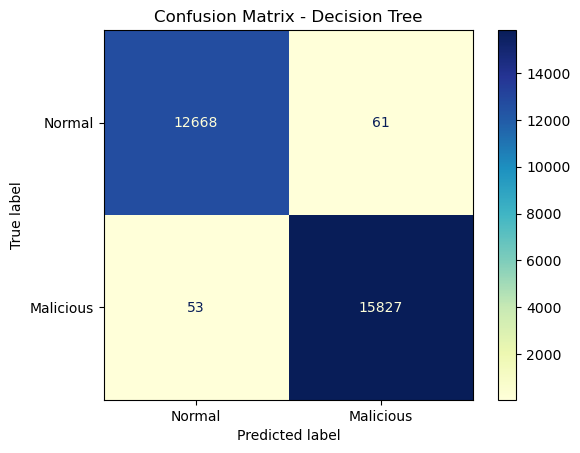


üöÄ **Classification Report:**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12729
           1       1.00      1.00      1.00     15880

    accuracy                           1.00     28609
   macro avg       1.00      1.00      1.00     28609
weighted avg       1.00      1.00      1.00     28609



In [18]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Malicious'])
disp.plot(cmap='YlGnBu', values_format='d')

plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Print classification report
print("\nüöÄ **Classification Report:**")
print(classification_report(y_test, y_test_pred))


# Visualizing the Decision Tree

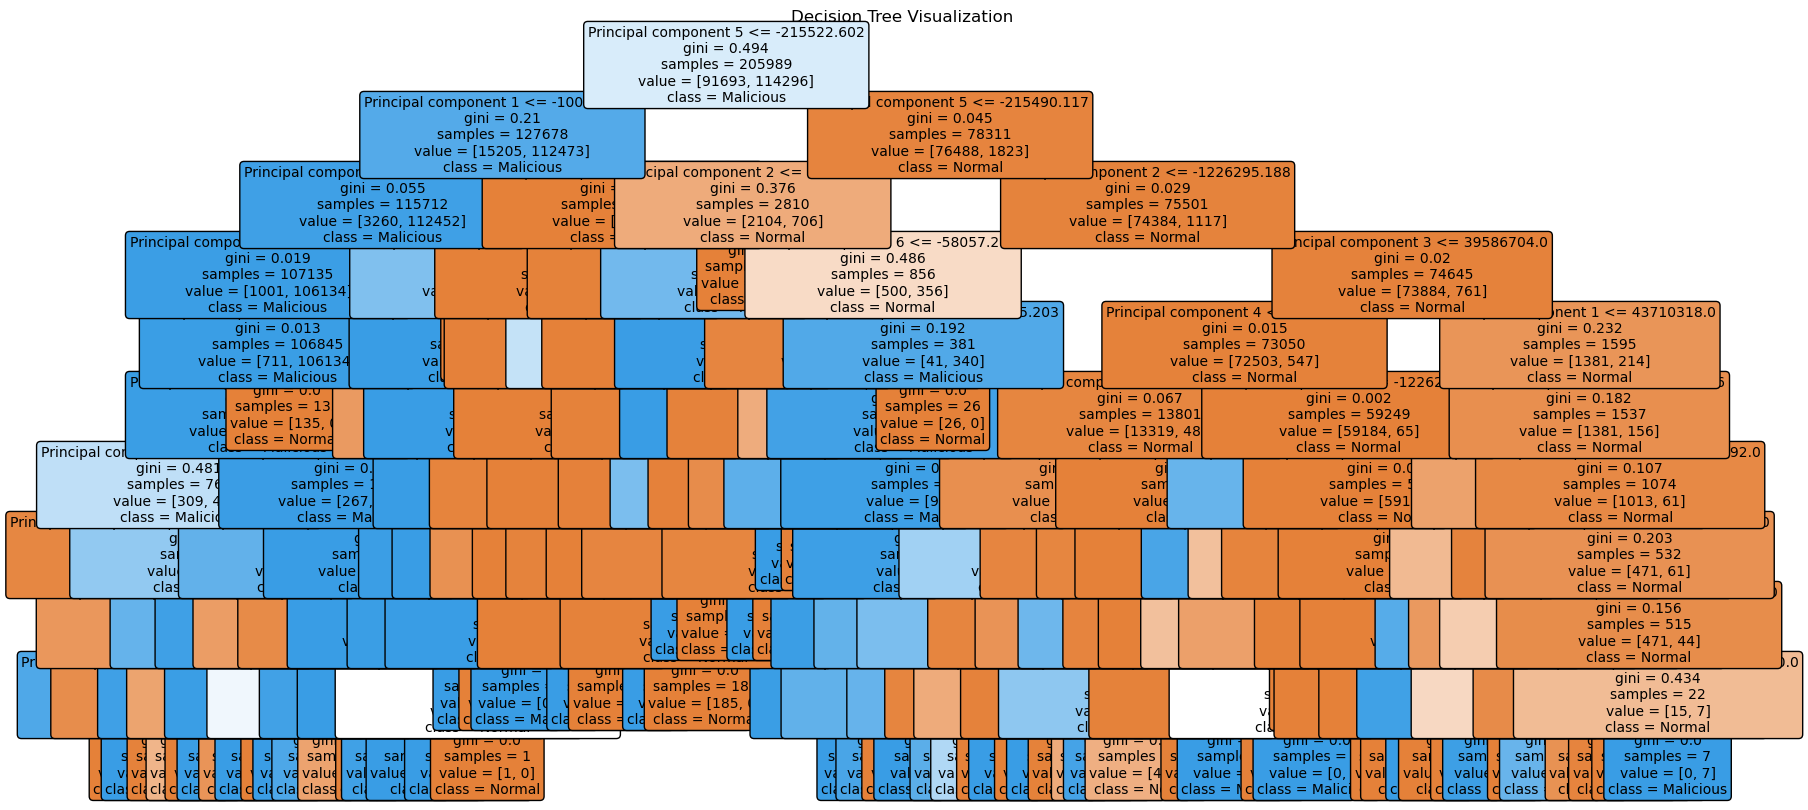

In [19]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=X_train.columns, 
    class_names=['Normal', 'Malicious'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


# Save the Trained Decision Tree Model

In [21]:
# Save the trained model
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models_CICIDS-2017/"
model_filename = "CICIDS-2017_DecisionTree.joblib"
model_path = model_folder + model_filename
joblib.dump(dt_model, model_path)

print(f"üöÄ **Decision Tree model saved to:** {model_path}")

üöÄ **Decision Tree model saved to:** ../../3_Post-Modeling-Phase/Trained_ML_models/Models_CICIDS-2017/CICIDS-2017_DecisionTree.joblib
